<a href="https://colab.research.google.com/github/pankjb/Data-Science/blob/main/EDA_Diabetes_Prediction_With_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 10.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=0bab642c2b7759ae7e29fa01d66e5330f6d87fe3d3598aa99e2fce1a3791de18
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
import pyspark

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName('Diabetes').getOrCreate()

In [6]:
df = spark.read.csv('diabetes.csv', header = True, inferSchema = True)

In [10]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [15]:
print(type(df))
print(type(df.toPandas()))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
df.toPandas()
# converts the Spark DataFrame into a pandas DataFrame.
#data is loaded into driver's memory. should not be used for large data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [ ]:

# nullable = True means field cannot be null
#all values are in number

In [8]:
df.describe()

DataFrame[summary: string, Pregnancies: string, Glucose: string, BloodPressure: string, SkinThickness: string, Insulin: string, BMI: string, DiabetesPedigreeFunction: string, Age: string, Outcome: string]

In [9]:
df.describe().toPandas()
# in Pandas format: looks better but not recommended for large dataset

,summary,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,count,768,768,768,768,768,768,768,768,768
1,mean,3.8450520833333335,120.89453125,69.10546875,20.536458333333332,79.79947916666667,31.992578124999977,0.4718763020833327,33.240885416666664,0.3489583333333333
2,stddev,3.36957806269887,31.97261819513622,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.476951377242799
3,min,0,0,0,0,0,0.0,0.078,21,0
4,max,17,199,122,99,846,67.1,2.42,81,1


In [16]:
df.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

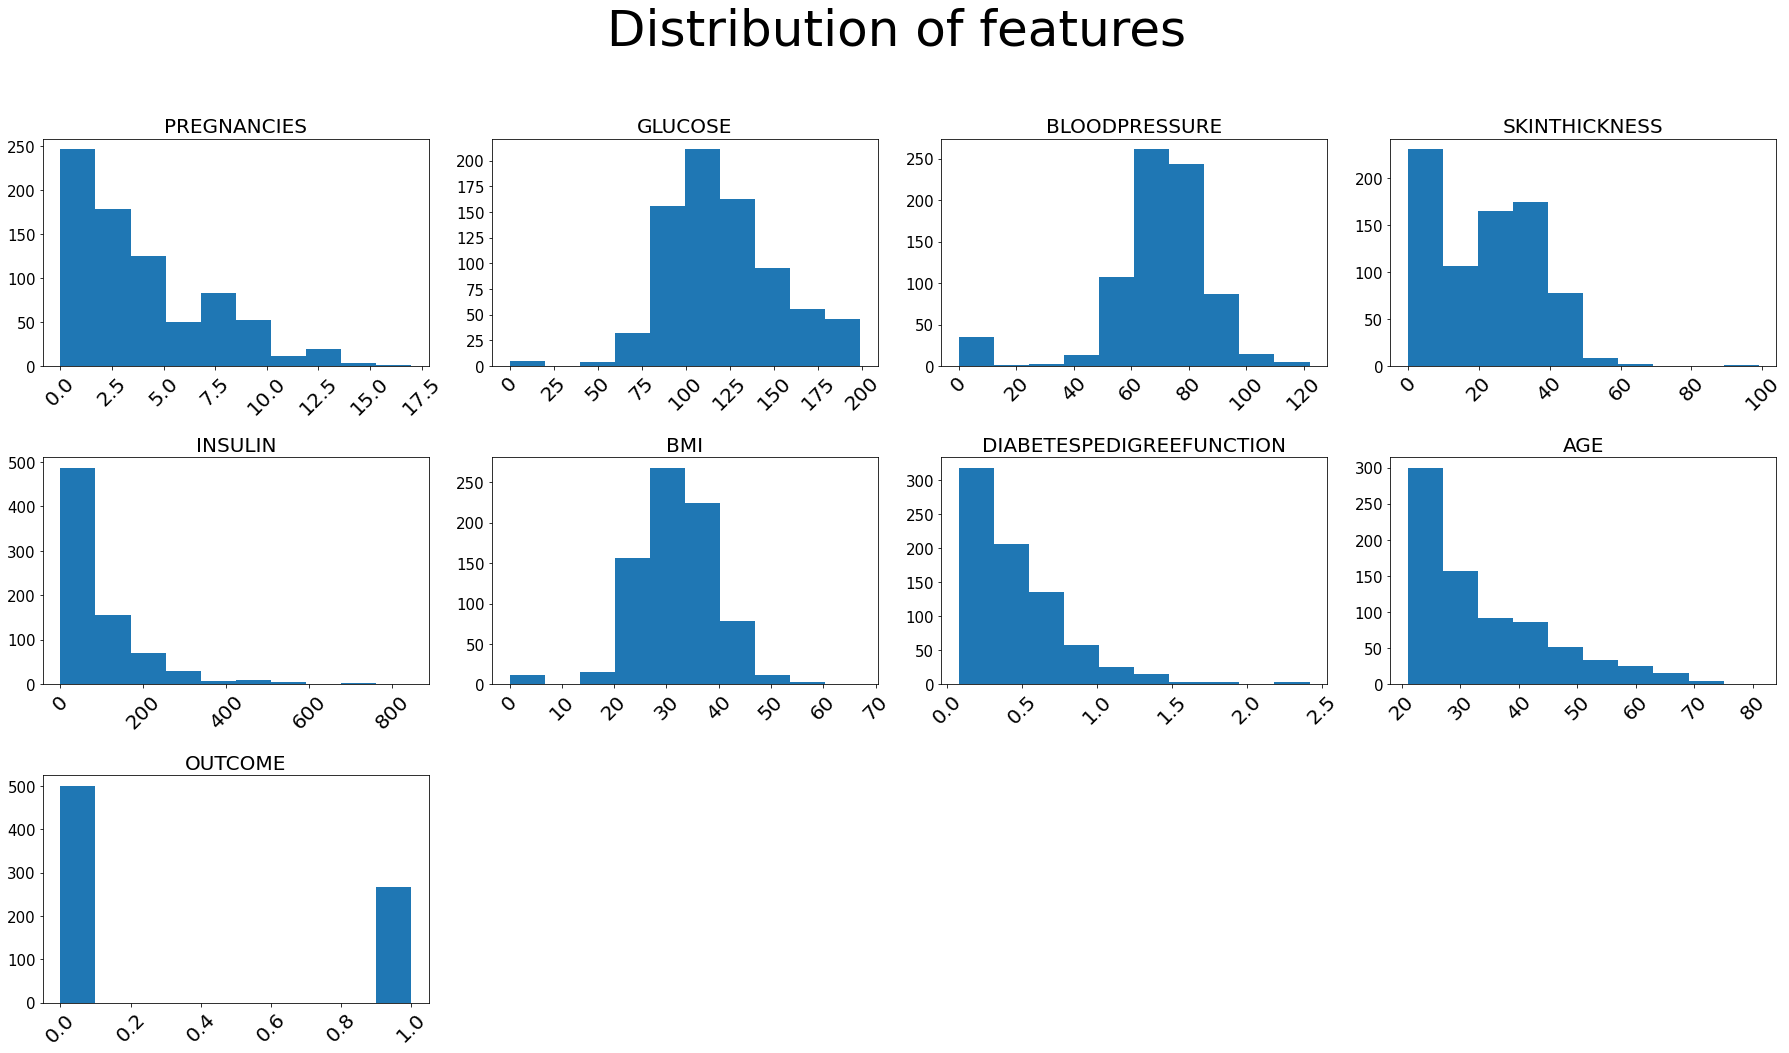

In [21]:
fig = plt.figure(figsize = (25,15))
st = fig.suptitle('Distribution of features', fontsize = 50, verticalalignment = 'center')
for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3,4,num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation = 45, fontsize = 20)
  plt.yticks(fontsize = 15)
  plt.title(col.upper(), fontsize = 20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top = 0.85, hspace = 0.4)
plt.show()

In [22]:
from pyspark.sql.functions import isnan, when, count, col

In [26]:
df.select([count(when(isnan(c),c)).alias(c) for c in df.columns]).toPandas().head()
#isnan: is not a number
#checking for missing values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0,0,0,0


User Defined Functions

In [28]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [30]:
y_udf = udf(lambda y: 'no' if y==0 else 'yes', StringType())


In [33]:
df = df.withColumn('HasDiabetes', y_udf('Outcome')).drop('Outcome')

In [34]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|HasDiabetes|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|        yes|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|         no|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|        yes|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|         no|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|        yes|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|         no|
|          3|     78|           50|           32|     88|31.0|  

In [35]:
def udf_multi(age):
  if (age <= 25):
    return 'Under 25'
  elif (age >= 25 and age <= 35):
    return 'Betweenn 25 and 35'
  elif (age > 35 and age < 50):
    return 'Between 35 and 50'
  elif (age >= 50):
    return 'over 50'
  else: return 'NA'

In [36]:
age_udf = udf(udf_multi)
df = df.withColumn('age_udf', age_udf('Age'))

In [37]:
df.show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----------+------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|HasDiabetes|           age_udf|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----------+------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|        yes|           over 50|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|         no|Betweenn 25 and 35|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----------+------------------+
only showing top 2 rows



In [38]:
from pyspark.sql import functions as F
from pyspark.sql.functions import rank, sum, desc
from pyspark.sql import Window

In [40]:
window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

In [42]:
age_group_tab = df.select(['age_udf', 'Glucose']).\
  groupBy('age_udf').\
  agg(
      F.count('Glucose').alias('UserCount'),
      F.mean('Glucose').alias('Glucose_AVG'),
      F.max('Glucose').alias('Glucose_Max'),
      F.min('Glucose').alias('Glucose_Min')).\
    withColumn('total', sum(col('UserCount')).over(window)).\
    withColumn('Percent', col('UserCount')*100 / col('total')).\
    drop(col('total')).sort(desc('Percent'))

In [44]:
age_group_tab.toPandas()

,age_udf,UserCount,Glucose_AVG,Glucose_Max,Glucose_Min,Percent
0,Under 25,267,110.719101,199,0,34.765625
1,Betweenn 25 and 35,231,121.670996,198,71,30.078125
2,Between 35 and 50,181,125.740331,197,0,23.567708
3,over 50,89,139.550562,197,57,11.588542


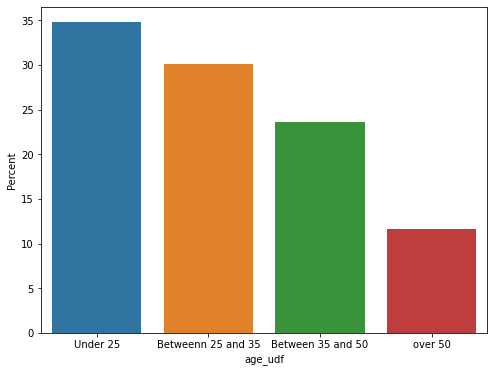

In [48]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'age_udf', y = 'Percent', data = age_group_tab.toPandas());

Correlation

In [50]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- HasDiabetes: string (nullable = true)
 |-- age_udf: string (nullable = true)



In [53]:
numeric_features = [t[0] for t in df.dtypes if t[1] != 'string']
numeric_features_df = df.select(numeric_features)
numeric_features_df.toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [54]:
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])

In [56]:
from pyspark.mllib.stat import Statistics
import pandas as pd

In [57]:
corr_mat = Statistics.corr(features, method = 'pearson')
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df, 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00


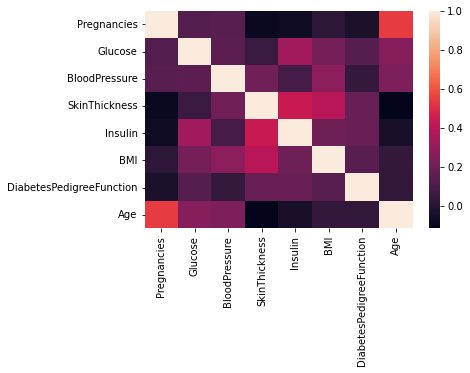

In [58]:
sns.heatmap(corr_df)